In [2]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

# Ref: https://stackoverflow.com/questions/48610132/
#      tensorflow-crash-with-cudnn-status-alloc-failed/53707323#53707323
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_virtual_device_configuration(gpus[0], 
#   [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3096)])

2.16.2


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same',input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2),strides=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D((2, 2),strides=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\phuri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,714 (1.22 MB)

 Trainable params: 320,714 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(train_images, train_labels, batch_size=256, validation_data=(test_images, test_labels), epochs=50)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.5799 - loss: 1.1126 - val_accuracy: 0.8326 - val_loss: 0.4604
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.8210 - loss: 0.4864 - val_accuracy: 0.8613 - val_loss: 0.3821
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8493 - loss: 0.4151 - val_accuracy: 0.8737 - val_loss: 0.3401
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.8651 - loss: 0.3680 - val_accuracy: 0.8827 - val_loss: 0.3150
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.8748 - loss: 0.3431 - val_accuracy: 0.8896 - val_loss: 0.2970
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.8815 - loss: 0.3208 - val_accuracy: 0.8947 - val_loss: 0.2828
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.8887 - loss: 0.3049 - val_accuracy: 0.8945 - val_loss: 0.2795
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.8913 - loss: 0.2956 - 

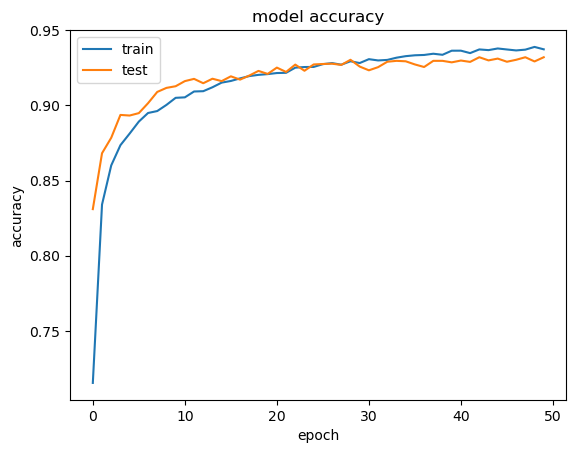

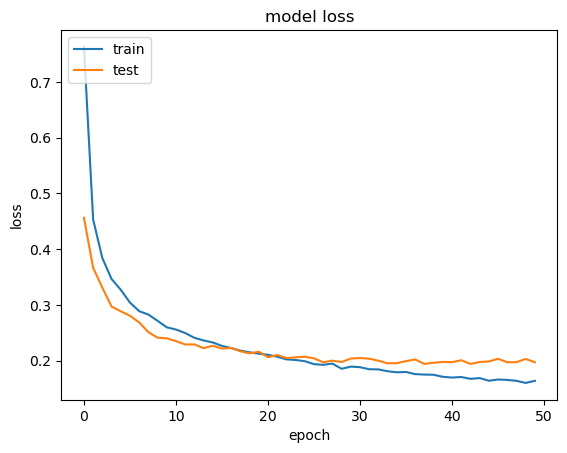

In [6]:
# plot accuracy history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, classification_report


y_test = test_labels
y_pred = model.predict(test_images)

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

313/313 [==============================] - 1s 2ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)

In [29]:
y_pred = np.argmax(y_pred,axis = 1)
y_pred

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

<Figure size 1000x1000 with 0 Axes>

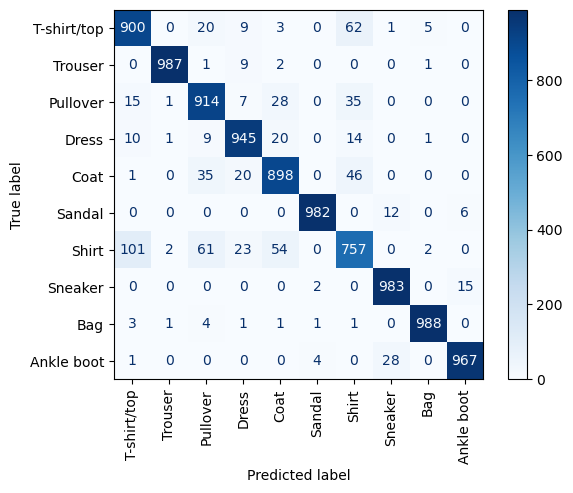

In [32]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues,xticks_rotation="vertical",)
plt.show()


In [31]:
print(classification_report(y_test,y_pred,target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.90      0.89      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.88      0.91      0.89      1000
       Dress       0.93      0.94      0.94      1000
        Coat       0.89      0.90      0.90      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.83      0.76      0.79      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

